<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_5/KDD_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 2: Data Understanding and Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = '/content/supermarket_sales - Sheet1.csv'  # Use the uploaded dataset path
df = pd.read_csv(url)

In [3]:
# Display first few rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Check for missing values
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [5]:
# Summary statistics
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [6]:
# Convert 'Date' column to datetime (if it exists)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [8]:
# Feature engineering: Create new features (e.g., sales per customer)
df_encoded['Total'] = df_encoded['Quantity'] * df_encoded['Unit price']

In [9]:
# Step 3: Clustering - Customer Segmentation

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Select relevant features for clustering (drop irrelevant ones like 'Invoice ID')
X = df_encoded[['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']]


In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Cluster customers into 3 groups
df_encoded['Cluster'] = kmeans.fit_predict(X_scaled)


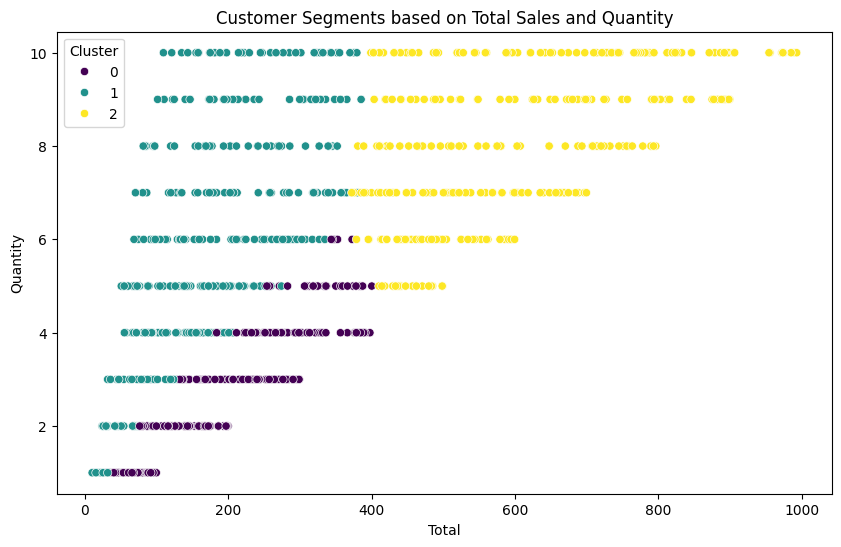

In [13]:
# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total', y='Quantity', hue='Cluster', data=df_encoded, palette='viridis')
plt.title('Customer Segments based on Total Sales and Quantity')
plt.show()

In [14]:
# Step 4: Association Rule Mining

from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
# For association rule mining, let's focus on products bought and payment methods
# Simplify the dataset for this example

# Create a basket where each row is a transaction and columns represent product categories (one-hot encoding)
basket = pd.get_dummies(df[['Product line']], drop_first=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Check the available columns again to ensure proper one-hot encoding
print(df.columns)

# One-hot encode 'Product line' and 'Payment' columns for association rule mining
basket = pd.get_dummies(df[['Product line', 'Payment']], drop_first=True)

# Ensure the basket is correctly formatted for Apriori algorithm
print(basket.head())


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
   Product line_Fashion accessories  Product line_Food and beverages  \
0                             False                            False   
1                             False                            False   
2                             False                            False   
3                             False                            False   
4                             False                            False   

   Product line_Health and beauty  Product line_Home and lifestyle  \
0                            True                            False   
1                           False                            False   
2                           False                             True   
3                           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Apply Apriori algorithm with a lower minimum support, say 0.01 (1%)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Check the frequent itemsets
print(frequent_itemsets)

    support                                           itemsets
0     0.178                 (Product line_Fashion accessories)
1     0.174                  (Product line_Food and beverages)
2     0.152                   (Product line_Health and beauty)
3     0.160                  (Product line_Home and lifestyle)
4     0.166                   (Product line_Sports and travel)
5     0.311                              (Payment_Credit card)
6     0.345                                  (Payment_Ewallet)
7     0.056  (Payment_Credit card, Product line_Fashion acc...
8     0.065  (Product line_Fashion accessories, Payment_Ewa...
9     0.061  (Product line_Food and beverages, Payment_Cred...
10    0.056  (Product line_Food and beverages, Payment_Ewal...
11    0.050  (Payment_Credit card, Product line_Health and ...
12    0.053  (Product line_Health and beauty, Payment_Ewallet)
13    0.045  (Product line_Home and lifestyle, Payment_Cred...
14    0.064  (Product line_Home and lifestyle, Payment_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Generate and check the association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                          antecedents            consequents  support  \
0  (Product line_Fashion accessories)  (Payment_Credit card)    0.056   
1  (Product line_Fashion accessories)      (Payment_Ewallet)    0.065   
2   (Product line_Food and beverages)  (Payment_Credit card)    0.061   
3   (Product line_Food and beverages)      (Payment_Ewallet)    0.056   
4    (Product line_Health and beauty)  (Payment_Credit card)    0.050   
5    (Product line_Health and beauty)      (Payment_Ewallet)    0.053   
6   (Product line_Home and lifestyle)  (Payment_Credit card)    0.045   
7   (Product line_Home and lifestyle)      (Payment_Ewallet)    0.064   
8    (Product line_Sports and travel)  (Payment_Credit card)    0.053   
9    (Product line_Sports and travel)      (Payment_Ewallet)    0.054   

   confidence      lift  
0    0.314607  1.011597  
1    0.365169  1.058460  
2    0.350575  1.127250  
3    0.321839  0.932867  
4    0.328947  1.057709  
5    0.348684  1.010679  
6    0.281250 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


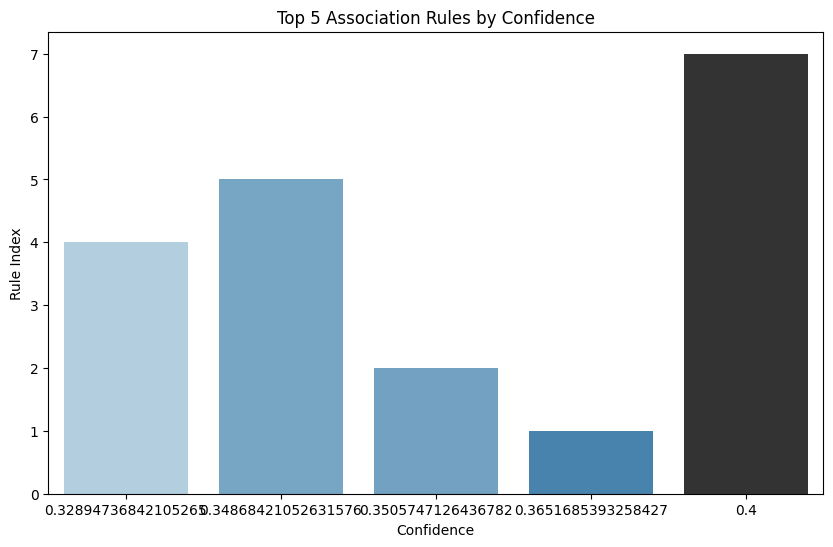

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort rules by confidence and plot the top 5
top_rules = rules.sort_values(by='confidence', ascending=False).head(5)

plt.figure(figsize=(10, 6))

# Assign 'confidence' to hue to avoid deprecation warning
sns.barplot(x='confidence', y=top_rules.index, data=top_rules, hue='confidence', palette='Blues_d', dodge=False)

# Remove the legend as it's unnecessary for this plot
plt.legend([], [], frameon=False)

plt.title('Top 5 Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Rule Index')
plt.show()


In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering on reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Calculate Silhouette Score for KMeans with PCA-reduced data
score = silhouette_score(X_pca, labels)
print(f'Silhouette Score with PCA: {score}')


Silhouette Score with PCA: 0.3600072737841342


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


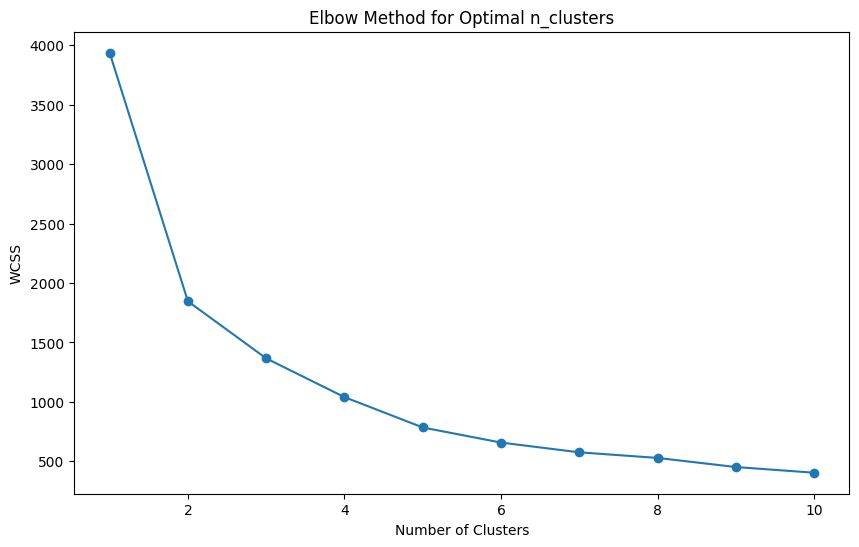

In [22]:
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
labels = agglomerative.fit_predict(X_pca)

# Calculate Silhouette Score
score = silhouette_score(X_pca, labels)
print(f'Silhouette Score for Agglomerative Clustering: {score}')


Silhouette Score for Agglomerative Clustering: 0.3389778650090975


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
labels = gmm.fit_predict(X_pca)

# Calculate Silhouette Score
score = silhouette_score(X_pca, labels)
print(f'Silhouette Score for Gaussian Mixture Model: {score}')


Silhouette Score for Gaussian Mixture Model: 0.3593182524745432


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering on reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Calculate Silhouette Score for KMeans with PCA-reduced data
score = silhouette_score(X_pca, labels)
print(f'Silhouette Score with PCA: {score}')


Silhouette Score with PCA: 0.3600072737841342


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
from sklearn.cluster import DBSCAN

# Try different eps and min_samples values
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Check the number of noise points
n_noise = list(labels).count(-1)
print(f'Number of noise points: {n_noise}')

# Calculate Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score for DBSCAN: {score}')


Number of noise points: 761
Silhouette Score for DBSCAN: -0.40000970526467644


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Apply GMM with different covariance types
gmm_full = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_full = gmm_full.fit_predict(X_pca)

gmm_tied = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
labels_tied = gmm_tied.fit_predict(X_pca)

# Evaluate the silhouette scores
score_full = silhouette_score(X_pca, labels_full)
score_tied = silhouette_score(X_pca, labels_tied)

print(f'Silhouette Score with full covariance: {score_full}')
print(f'Silhouette Score with tied covariance: {score_tied}')


Silhouette Score with full covariance: 0.3593182524745432
Silhouette Score with tied covariance: 0.3528512077894934


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


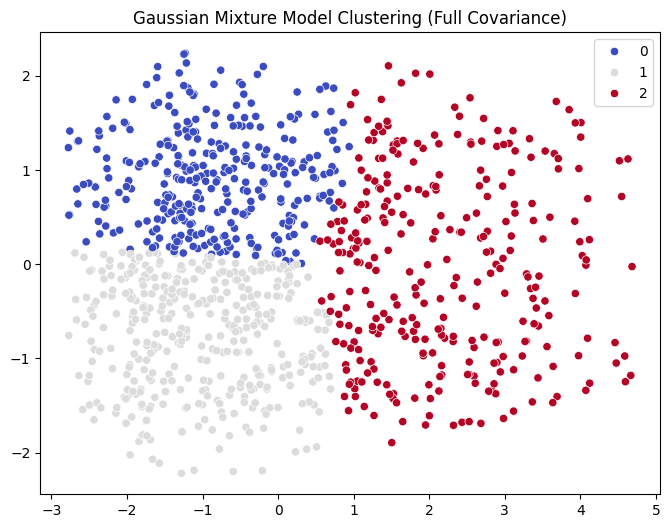

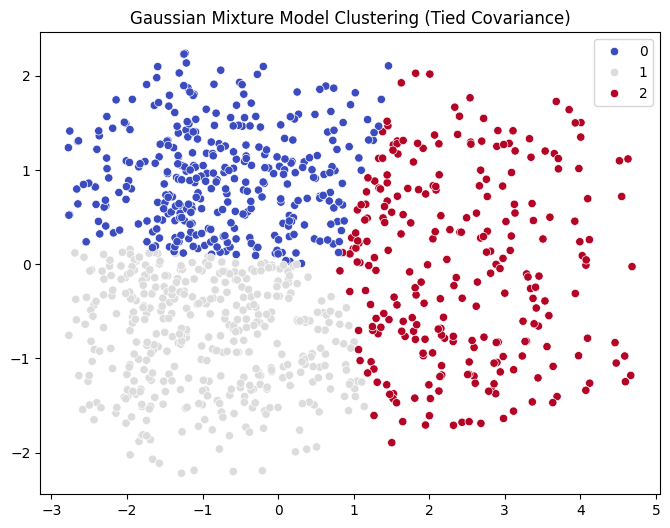

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize GMM clusters with full covariance
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_full, palette='coolwarm')
plt.title('Gaussian Mixture Model Clustering (Full Covariance)')
plt.show()

# Visualize GMM clusters with tied covariance
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_tied, palette='coolwarm')
plt.title('Gaussian Mixture Model Clustering (Tied Covariance)')
plt.show()


In [29]:
import joblib

# Save the trained clustering model
joblib.dump(kmeans, 'kmeans_clustering_model.pkl')

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:

# Load the saved model
kmeans_loaded = joblib.load('kmeans_clustering_model.pkl')

# Use the loaded model for predictions
labels = kmeans_loaded.predict(X_pca)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [31]:
# Save the association rules as a CSV
rules.to_csv('association_rules.csv', index=False)
